---

## Ex. No: 2 FEATURE SELECTION AND FEATURE EXTRACTION

###                      **REG_NO**:URK22AI1026

**AIM:**  
To implement feature selection and feature extraction techniques on a given dataset.

**DESCRIPTION:**  

**FEATURE SELECTION:**  
Feature selection is the process of choosing a subset of relevant features from the original feature set. It helps reduce model complexity, improve computational efficiency, and minimize generalization error by removing irrelevant features.

**Methods:**

1. **Remove Unused Columns:** Eliminate columns that are not used for analysis.
2. **Remove Column with Outlier:** Drop columns with significant outliers.
3. **Remove Features with Missing Values:** Remove features that have too many missing values.
4. **Remove Features with Low Variance:** Drop features with minimal variance as they add little information.
5. **Remove Uncorrelated Features with Target:** Exclude features that do not correlate with the target variable.
6. **Remove Highly Correlated Features (Multicollinearity):** Drop features that are highly correlated with each other to avoid redundancy.
7. **Univariate Feature Selection:** Use statistical tests to select features that have the strongest relationship with the target variable. This can be done using `SelectKBest` from Scikit-learn.
8. **Information Gain-based Feature Selection:** Calculate mutual information between features and the target to select the features with the highest information gain.

**FEATURE EXTRACTION:**  
Feature extraction involves transforming the original features into a new set of features that better represent the data, often leading to improved model performance.

**Techniques:**

1. **Principal Component Analysis (PCA):** PCA is a dimensionality reduction technique that identifies patterns in data, transforming it into a lower-dimensional space while retaining most of the variance.
2. **Linear Discriminant Analysis (LDA):** Unlike PCA, LDA is a supervised technique that seeks to reduce dimensionality by maximizing the separation between different classes.

**DATA REDUCTION:**  
Data reduction involves techniques to reduce the volume of data while preserving its integrity. It includes dimensionality reduction, numerosity reduction, and data compression.

**DIMENSIONALITY REDUCTION METHODS:**

1. **Feature Selection Methods Using Correlation Coefficient Methods:**
   - **Pearson Correlation Coefficient:** Measures the linear correlation between features.
   - **Spearman Correlation Coefficient:** Assesses monotonic relationships.
   - **Chi-Squared Test:** Evaluates the independence between categorical features.
   - **Kendall Tau Test:** Measures correlation based on rank data.

2. **Matrix Factorization:**
   - **Principal Component Analysis (PCA):** Reduces dimensionality by preserving the direction of maximum variance.

3. **Manifold Learning:**
   - **t-SNE:** A technique to visualize high-dimensional data in lower dimensions, focusing on preserving local structure.

4. **Auto Encoders:**
   - Neural networks used to learn efficient codings of input data.

**Steps for PCA:**

1. **Standardize the Dataset:** Normalize the data to have zero mean and unit variance.
2. **Compute Covariance Matrix:** Calculate the covariance matrix of the standardized data.
3. **Find Eigenvalues and Eigenvectors:** Extract eigenvalues and eigenvectors from the covariance matrix.
4. **Select Top Features:** Choose the top eigenvectors corresponding to the largest eigenvalues to form the principal components.

---

1. **Read and Analyze the Data:**
   - This step involves loading the dataset into a DataFrame and performing an initial inspection to understand its structure and contents. Key activities include checking the number of rows and columns, identifying data types, and summarizing basic statistics.


In [ ]:
import pandas as pd

df = pd.read_csv('heart.csv')
print("Dataset Overview:")
print(df.head())

print("\nDataset Description:")
print(df.describe())


Dataset Overview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Dataset Description:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000

2. **Split the Dataset into Train and Test Sets:**
   - Splitting the dataset into training and testing sets ensures that we have separate data for training the model and evaluating its performance. Typically, a common split ratio is 80/20 or 70/30, where the larger portion is used for training and the smaller portion for testing.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('heart.csv')

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set (X_train):")
print(X_train.head())

print("\nTraining set (y_train):")
print(y_train.head())

print("\nTesting set (X_test):")
print(X_test.head())

print("\nTesting set (y_test):")
print(y_test.head())


Training set (X_train):
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   42    1   1       120   295    0        1      162      0      0.0   
202   58    1   0       150   270    0        0      111      1      0.8   
196   46    1   2       150   231    0        1      147      0      3.6   
75    55    0   1       135   250    0        0      161      0      1.4   
176   60    1   0       117   230    1        1      160      1      1.4   

     slope  ca  thal  
132      2   0     2  
202      2   0     3  
196      1   0     2  
75       1   0     2  
176      2   2     3  

Training set (y_train):
132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

Testing set (X_test):
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
179   57    1   0       150   276    0        0      112      1      0.6   
228   59    1   3       170   288    0        0      159      0      0.2   
111   57    1   2       150   126

3. **Check Shape of Training and Test Sets:**
   - This involves verifying the dimensions of the training and testing sets to ensure they were split correctly. The shape of a dataset is given by the number of rows and columns, which helps confirm that the data has been partitioned as intended.


In [ ]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (242, 13)
Test set shape: (61, 13)



4. **Perform Scaling in the Data Using Standard Scaler:**
   - Scaling the data is crucial for many machine learning algorithms that are sensitive to the scale of input features. Standard scaling transforms the data to have a mean of 0 and a standard deviation of 1, ensuring all features contribute equally to the model.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training set:")
print(X_train_scaled[:5])


Scaled training set:
[[-1.35679832  0.72250438  0.00809909 -0.61685555  0.91403366 -0.38330071
   0.8431327   0.53278078 -0.67663234 -0.92086403  0.95390513 -0.68970073
  -0.50904773]
 [ 0.38508599  0.72250438 -0.97189094  1.1694912   0.43952674 -0.38330071
  -1.04610909 -1.75358236  1.47790748 -0.19378705  0.95390513 -0.68970073
   1.17848036]
 [-0.92132724  0.72250438  0.98808912  1.1694912  -0.30070405 -0.38330071
   0.8431327  -0.13967897 -0.67663234  2.3509824  -0.69498803 -0.68970073
  -0.50904773]
 [ 0.05848269 -1.38407465  0.00809909  0.27631782  0.0599212  -0.38330071
  -1.04610909  0.48795013 -0.67663234  0.35152069 -0.69498803 -0.68970073
  -0.50904773]
 [ 0.60282153  0.72250438 -0.97189094 -0.79549023 -0.31968433  2.60891771
   0.8431327   0.44311948  1.47790748  0.35152069  0.95390513  1.33342142
   1.17848036]]


5. **Calculate the % of Missing Values in a Column:**
   - This step involves calculating the percentage of missing values for each column in the dataset. Identifying missing values is essential for deciding how to handle them in subsequent steps.

In [ ]:
missing_percentage = df.isnull().mean() * 100
print("\nPercentage of Missing Values in Each Column:")
print(missing_percentage)


Percentage of Missing Values in Each Column:
age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


6. **Remove Features with Missing Values (>20%):**
   - Features (columns) with more than 20% missing values are often removed from the dataset to avoid bias and inaccuracies that might arise from excessive imputation.


In [ ]:
# Remove features with missing values (>20%)
features_to_drop = missing_percentage[missing_percentage > 20].index
df.drop(columns=features_to_drop)
print("\nFeatures dropped due to missing values > 20%:")
print(features_to_drop)



Features dropped due to missing values > 20%:
Index([], dtype='object')



7. **If the Missing Values is <20%, Do Data Imputation (Mean/Median):**
   - For columns with less than 20% missing values, imputation is performed. Mean or median imputation fills missing values with the average or median of the column, preserving the overall distribution of the data.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print("\nData after imputation:")
print(df_imputed.head())


Data after imputation:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  3.0     145.0  233.0  1.0      0.0    150.0    0.0      2.3   
1  37.0  1.0  2.0     130.0  250.0  0.0      1.0    187.0    0.0      3.5   
2  41.0  0.0  1.0     130.0  204.0  0.0      0.0    172.0    0.0      1.4   
3  56.0  1.0  1.0     120.0  236.0  0.0      1.0    178.0    0.0      0.8   
4  57.0  0.0  0.0     120.0  354.0  0.0      1.0    163.0    1.0      0.6   

   slope   ca  thal  target  
0    0.0  0.0   1.0     1.0  
1    0.0  0.0   2.0     1.0  
2    2.0  0.0   2.0     1.0  
3    2.0  0.0   2.0     1.0  
4    2.0  0.0   2.0     1.0  


8. **Remove the Outliers:**
   - Outliers can significantly skew the results of a machine learning model. Identifying and removing them, often using statistical methods like Z-score, helps in maintaining the integrity of the dataset.

In [ ]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).all(axis=1)
df_cleaned = df[~outliers]
print(f"\nData shape after removing outliers: {df_cleaned.shape}")


Data shape after removing outliers: (303, 14)


9. **Use sklearn VarianceThreshold to Find the Constant Features and Display the Constant Features:**
   - The VarianceThreshold method identifies features with low variance, often constant features that do not provide any useful information for the model. Removing these features helps in reducing the dimensionality without losing information.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0)#can give any other values ex:1.0
selector.fit(df_cleaned)
constant_features = [column for column in df_cleaned.columns if column not in df_cleaned.columns[selector.get_support()]]
print("\nConstant features:")
print(constant_features)



Constant features:
['sex', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']


10. **Remove Features with Low Variance:**
    - After identifying constant or near-constant features, these are removed to improve model performance and reduce computational complexity.

In [ ]:
df_cleaned = df_cleaned[df_cleaned.columns[selector.get_support()]]
print(f"\nData shape after removing low variance features: {df_cleaned.shape}")



Data shape after removing low variance features: (303, 7)


11. **Remove Highly Correlated Features:**
    - Highly correlated features can cause multicollinearity, which can degrade the model's performance. Identifying and removing these features ensures that each feature contributes unique information to the model.



In [ ]:
# Remove highly correlated features
corr_matrix = df_cleaned.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # Use bool instead of np.bool
highly_correlated_features = [column for column in upper.columns if any(upper[column] > 0.95)]
df_cleaned.drop(columns=highly_correlated_features, inplace=True)
print("\nHighly correlated features removed:")
print(highly_correlated_features)


Highly correlated features removed:
[]


12. **Perform Univariate Feature Selection (SelectKBest, SelectPercentile):**
    - Univariate feature selection involves selecting the best features based on univariate statistical tests. Methods like SelectKBest or SelectPercentile help in retaining the most relevant features based on their statistical significance.



In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

kbest = SelectKBest(score_func=f_classif, k=10)
X_kbest = kbest.fit_transform(X_train_scaled, y_train)
print(f"\nShape after SelectKBest: {X_kbest.shape}")



Shape after SelectKBest: (242, 10)


13. **Apply Pearson Correlation Coefficient/Spearman’s Rank Coefficient and Find Correlation-Matrix with Heatmap:**
    - These correlation coefficients measure the linear or monotonic relationship between features and the target variable. Visualizing the correlation matrix using a heatmap helps in understanding the relationships and identifying multicollinearity.

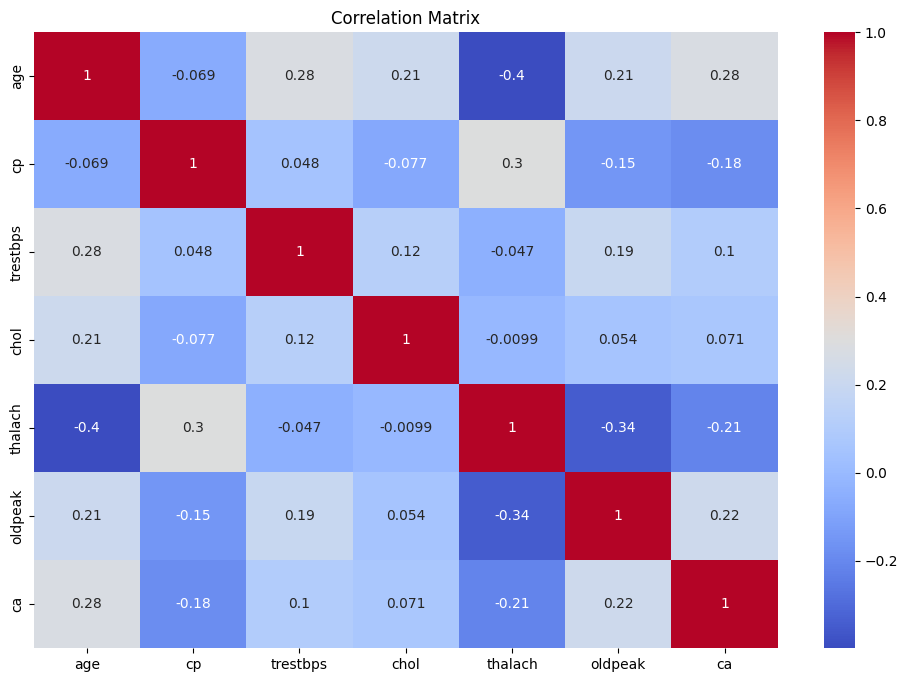

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Apply Pearson Correlation Coefficient and find Correlation-Matrix with Heatmap
corr_matrix = df_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()




14. **Apply Principal Component Analysis (PCA) for Matrix Factorization:**
    - PCA is a dimensionality reduction technique that transforms the original features into a smaller set of uncorrelated features (principal components). This helps in reducing the dimensionality while retaining most of the variance in the data.



In [ ]:
from sklearn.decomposition import PCA

# Apply Principal Component Analysis (PCA) for matrix factorization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
print(f"\nShape after PCA: {X_pca.shape}")



Shape after PCA: (242, 2)


15. **Apply Linear Discriminant Analysis (LDA) to Perform Feature Extraction:**
    - LDA is a supervised dimensionality reduction technique that finds the linear combinations of features that best separate the classes. This technique is particularly useful when the goal is to maximize class separability.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Apply Linear Discriminant Analysis (LDA) to perform feature extraction
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_train_scaled, y_train)
print(f"\nShape after LDA: {X_lda.shape}")



Shape after LDA: (242, 1)


**Results:**

The dataset was split, scaled, and missing values addressed. Outliers and low-variance features were removed, and feature selection techniques, including PCA and LDA, were applied to enhance model performance.

In [ ]:
# Import necessary libraries
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
# from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load the dataset
# df = pd.read_csv('/content/heart.csv')  # Adjust the path if needed

# # 1. Read and analyze the data
# print("Dataset Overview:")
# print(df.head())
# print("\nDataset Description:")
# print(df.describe())

# # 2. Split the dataset into train and test sets
# X = df.drop('target', axis=1)
# y = df['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 3. Check shape of training and test sets
# print(f"Training set shape: {X_train.shape}")
# print(f"Test set shape: {X_test.shape}")

# # 4. Perform scaling in the data using Standard Scaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # 5. Calculate the % of missing values in a column
# missing_percentage = df.isnull().mean() * 100
# print("\nPercentage of Missing Values in Each Column:")
# print(missing_percentage)

# # 6. Remove features with missing values (>20%)
# features_to_drop = missing_percentage[missing_percentage > 20].index
# df.drop(columns=features_to_drop, inplace=True)
# print("\nFeatures dropped due to missing values > 20%:")
# print(features_to_drop)

# # 7. If the missing values is <20%, do data imputation (mean/median)
# imputer = SimpleImputer(strategy='mean')
# df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
# print("\nData after imputation:")
# print(df_imputed.head())

# # 8. Remove the outliers
# from scipy import stats
# z_scores = np.abs(stats.zscore(df_imputed.select_dtypes(include=[np.number])))
# outliers = (z_scores > 3).all(axis=1)
# df_cleaned = df_imputed[~outliers]
# print(f"\nData shape after removing outliers: {df_cleaned.shape}")

# # 9. Use sklearn VarianceThreshold to find the constant features and display the constant features
# selector = VarianceThreshold(threshold=0.0)
# selector.fit(df_cleaned)
# constant_features = [column for column in df_cleaned.columns if column not in df_cleaned.columns[selector.get_support()]]
# print("\nConstant features:")
# print(constant_features)

# # 10. Remove features with low variance
# df_cleaned = df_cleaned[df_cleaned.columns[selector.get_support()]]
# print(f"\nData shape after removing low variance features: {df_cleaned.shape}")

# # 11. Remove highly correlated features
# corr_matrix = df_cleaned.corr().abs()
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# highly_correlated_features = [column for column in upper.columns if any(upper[column] > 0.95)]
# df_cleaned.drop(columns=highly_correlated_features, inplace=True)
# print("\nHighly correlated features removed:")
# print(highly_correlated_features)

# # 12. Perform Univariate feature selection (SelectKBest, SelectPercentile)
# kbest = SelectKBest(score_func=f_classif, k=10)
# X_kbest = kbest.fit_transform(X_train_scaled, y_train)
# print(f"\nShape after SelectKBest: {X_kbest.shape}")

# # 13. Apply Pearson Correlation Coefficient/Spearman’s rank coefficient and find Correlation-Matrix with Heatmap
# corr_matrix = df_cleaned.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title("Correlation Matrix")
# plt.show()

# # 14. Apply Principal Component Analysis (PCA) for matrix factorization
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_train_scaled)
# print(f"\nShape after PCA: {X_pca.shape}")

# # 15. Apply Linear Discriminant Analysis (LDA) to perform feature extraction
# lda = LDA(n_components=1)
# X_lda = lda.fit_transform(X_train_scaled, y_train)
# print(f"\nShape after LDA: {X_lda.shape}")
